<a href="https://colab.research.google.com/github/ajaythakur3369/FEC-IIT-Guwahati/blob/main/Coding_Assignment_Week_3_Black_Scholes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Black-Scholes Model**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - FEC, IIT Guwahati**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/FEC-IIT-Guwahati/blob/main/Coding_Assignment_Week_3_Black_Scholes_Model.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/133ti6ARwHtqPzHo_XbSImuvesNqgMXoa)**

# **Problem Statement -**

Calculate the Annual Volatility of the Stock (Yahoo Finance). Also, calculate the Options Price using the Black-Scholes Model.

# **Let's Begin !**

# **Black-Scholes Model**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**Importing the Libraries**

In [ ]:
# Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# To fetch data
import yfinance as yf

import scipy.stats as ss

**Importing Data**

In [ ]:
# Setting up the stock ticker and date range
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

# Fetching data
tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period = '1d', start = start, end = end, interval = '1d')

df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,0.0,0.0
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,0.0,0.0
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0


In [ ]:
# The ticker of the stock whose data is to be taken out
symbol = '^SPX'
dfo = yf.Ticker(symbol)

In [ ]:
# To get the date of different expiration time
dfo.options

('2023-12-26',
 '2023-12-27',
 '2023-12-28',
 '2023-12-29',
 '2024-01-02',
 '2024-01-03',
 '2024-01-04',
 '2024-01-05',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-12',
 '2024-01-16',
 '2024-01-17',
 '2024-01-18',
 '2024-01-19',
 '2024-01-22',
 '2024-01-23',
 '2024-01-24',
 '2024-01-25',
 '2024-01-26',
 '2024-01-29',
 '2024-01-30',
 '2024-01-31',
 '2024-02-02',
 '2024-02-05',
 '2024-02-09',
 '2024-02-12',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
# You can change the index to try on different expiry Dates
dfo_exp = dfo.option_chain(dfo.options[1])

In [ ]:
# Data for Call Options
dfo_exp.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW231227C01200000,2023-12-14 15:54:00+00:00,1200.0,3527.04,3541.9,3558.5,0.00,0.0,NaN,0,6.383303,True,REGULAR,USD
1,SPXW231227C02800000,2023-12-21 19:47:09+00:00,2800.0,1927.35,1942.9,1958.6,1927.35,NaN,NaN,2,2.628543,True,REGULAR,USD
2,SPXW231227C03200000,2023-12-13 17:40:31+00:00,3200.0,1452.29,1543.1,1558.7,0.00,0.0,NaN,2,2.034185,True,REGULAR,USD
3,SPXW231227C03750000,2023-12-14 20:35:02+00:00,3750.0,970.75,993.3,1008.8,0.00,0.0,2.0,1,1.305057,True,REGULAR,USD
4,SPXW231227C03850000,2023-12-15 16:05:54+00:00,3850.0,878.24,893.9,909.4,0.00,0.0,2.0,57,1.205753,True,REGULAR,USD


# **Calculation of Annual Volatility**
The Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiply it by sqrt(252) as there are 252 trading days in a year.

In [ ]:
# Function to calculate Annual Volatility
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    # Your code here
    log_return = np.log(df['Close']/df['Close'].shift(1))

    # Your code here, to remove nan
    log_return = log_return.dropna()

    # Your code here
    daily_vol = np.std(log_return)

    # Your code here
    vol = daily_vol * np.sqrt(252)

    return vol

In [ ]:
# Calculating Annual Volatility
vol = annual_vol(df)
vol

0.13245700760028073

# **Black-Scholes Model**


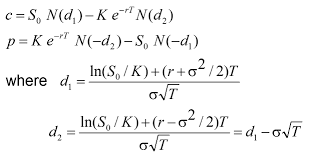

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk-free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
# Function to calculate Option Price using Black-Scholes model
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of Black-Scholes Model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """
    # Your code here
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        price = S*ss.norm.cdf(d1) - K*np.exp(-r*T)*ss.norm.cdf(d2)
    elif option == 'put':
        price = K*np.exp(-r*T)*ss.norm.cdf(-d2) - S*ss.norm.cdf(-d1)

    return price

In [ ]:
# Calculate the number of days left for expiry from your calculation in years
N = 100
T = 8.0/365
t = T/N

In [ ]:
# r is the risk-free rate taken from the 10 years of us treasury bond
# Call price calculated from Black-Scholes Model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r = 0.0123*t, sigma = vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient = 'index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1200.0,3554.629954
2800.0,1954.630048
3200.0,1554.630072
3750.0,1004.630104
3850.0,904.630110


In [ ]:
# Actual Call Price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace = True)
ac_call.head()

,ac_call
strike,
1200.0,3527.04
2800.0,1927.35
3200.0,1452.29
3750.0,970.75
3850.0,878.24


In [ ]:
# Combining Actual and Theoretical Call Option Prices
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,3554.629954,3527.04
2800.0,1954.630048,1927.35
3200.0,1554.630072,1452.29
3750.0,1004.630104,970.75
3850.0,904.630110,878.24
3900.0,854.630113,826.61
3950.0,804.630116,623.28
4000.0,754.630119,768.00
4050.0,704.630122,506.00
4100.0,654.630125,456.30


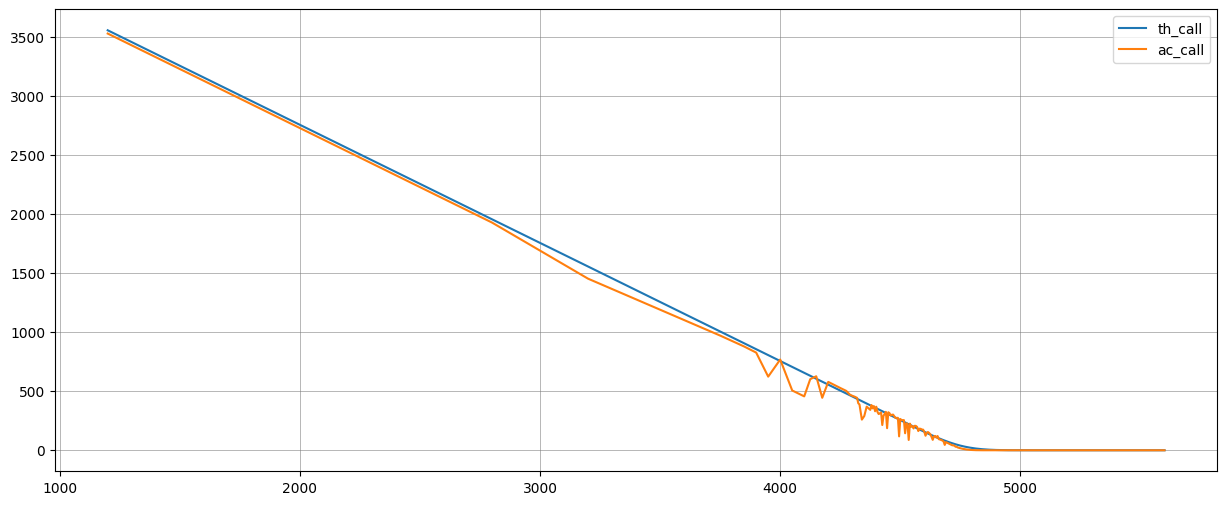

In [ ]:
# Plotting the Actual and Theoretical Call Prices
plt.rcParams['figure.figsize'] = (15, 6)
call.plot()
plt.grid(True, color = "grey", linewidth = "0.4")
plt.show()

In [ ]:
# r is the risk-free rate taken from the 10 years of us treasury bond
# Theoretical Put Price calculated from Black-Scholes Model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r = 0.0158*t, sigma = vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient = 'index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2000.0,0.000000e+00
2400.0,2.597036e-266
2600.0,5.278507e-208
2800.0,1.861941e-160
3000.0,9.454078e-122


In [ ]:
# Actual Put Price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice" : "ac_put"}, inplace = True)
ac_put.head()

,ac_put
strike,
2000.0,0.05
2400.0,0.05
2600.0,0.05
2800.0,0.10
3000.0,0.05


In [ ]:
# Combining Actual and Theoretical Put Option Prices
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4890.0,138.602488,174.33
4900.0,147.925085,239.15
4925.0,171.740484,213.38
4950.0,196.068781,191.55
4975.0,220.708457,216.29
5000.0,245.525618,240.57
5100.0,345.373896,331.88
5400.0,645.369707,737.66
5800.0,1045.369677,1078.95
6000.0,1245.369662,1263.71


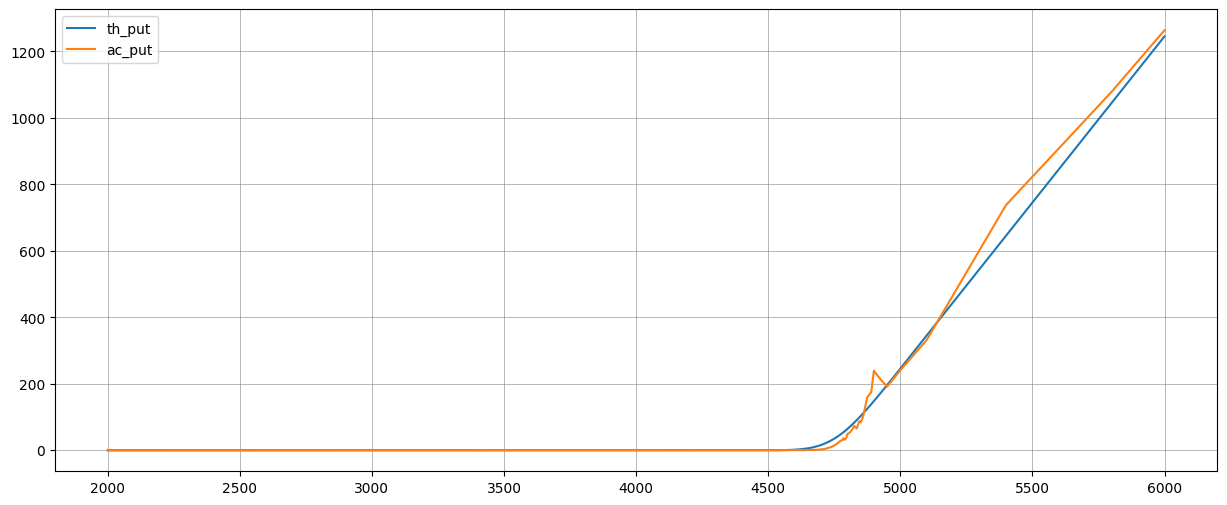

In [ ]:
# Plotting the Actual and Theoretical Put Prices
plt.rcParams['figure.figsize'] = (15, 6)
put.plot()
plt.grid(True, color = "grey", linewidth = "0.4")
plt.show()

**Conclusion -** We calculated -

*   The Annual Volatility of the Stock (Yahoo Finance),
*   The Price of both Call and Put Options using the Black-Scholes Model,
*   Plotted the Theoretical and Actual Prices of Call and Put Options.